In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('culiacan.TXT', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"


,DD/MM/AAAA,HH:MM,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL
0,31/01/2018,16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/01/2018,16:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31/01/2018,16:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31/01/2018,16:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31/01/2018,16:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
RAPVIENTO2    float64
RAPRAFAGA2    float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL,FECHA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 16:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 16:10:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 16:20:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 16:30:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 16:40:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,130.000000,130.0,130.000000
mean,156.450382,160.320611,1.327481,2.224427,21.370992,70.664122,1012.126923,0.0,47.146154
std,110.067197,106.602300,0.571779,0.971129,1.876473,9.796868,0.764096,0.0,74.101241
min,0.000000,0.000000,0.000000,0.000000,18.900000,51.000000,1011.100000,0.0,-1.000000
25%,65.000000,55.000000,0.900000,1.600000,19.800000,64.000000,1011.600000,0.0,-1.000000
50%,153.000000,162.000000,1.300000,2.200000,20.600000,72.000000,1011.900000,0.0,0.000000
75%,218.000000,238.500000,1.700000,2.900000,23.350000,77.500000,1012.400000,0.0,81.250000
max,360.000000,357.000000,2.700000,4.500000,24.600000,88.000000,1014.700000,0.0,255.000000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL,FECHA
20,159.0,258.0,2.2,3.9,24.2,55.0,1012.5,0.0,246.0,2018-01-31 19:20:00
21,168.0,220.0,1.8,3.3,24.4,55.0,1012.4,0.0,224.0,2018-01-31 19:30:00
22,173.0,305.0,1.8,3.3,24.6,54.0,1012.3,0.0,180.0,2018-01-31 19:40:00
23,160.0,305.0,1.8,3.8,24.5,55.0,1012.1,0.0,165.0,2018-01-31 19:50:00
24,161.0,227.0,1.4,2.7,24.5,56.0,1011.9,0.0,161.0,2018-01-31 20:00:00
25,151.0,203.0,1.5,2.7,24.5,57.0,1011.8,0.0,163.0,2018-01-31 20:10:00
26,180.0,224.0,1.9,3.1,24.6,56.0,1011.7,0.0,179.0,2018-01-31 20:20:00
27,189.0,222.0,1.9,3.1,24.6,56.0,1011.6,0.0,163.0,2018-01-31 20:30:00
28,179.0,226.0,1.5,2.5,24.4,56.0,1011.6,0.0,147.0,2018-01-31 20:40:00
29,194.0,222.0,2.1,3.3,24.3,56.0,1011.7,0.0,127.0,2018-01-31 20:50:00


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS           156.450382
DIRR           160.320611
RAPVIENTO2       1.327481
RAPRAFAGA2       2.224427
TEMP            21.370992
HR              70.664122
PB            1012.126923
PREC             0.000000
RADSOL          47.146154
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

21.37099236641222

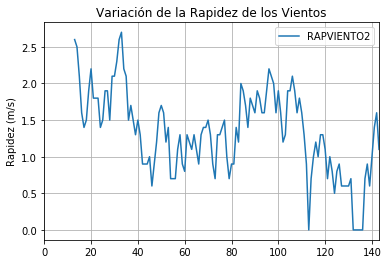

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.RAPVIENTO2.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

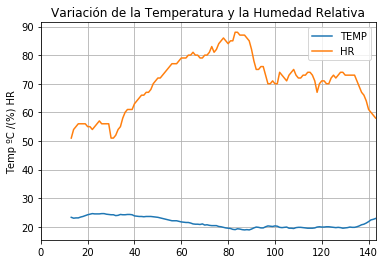

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

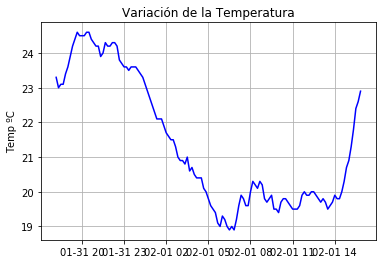

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

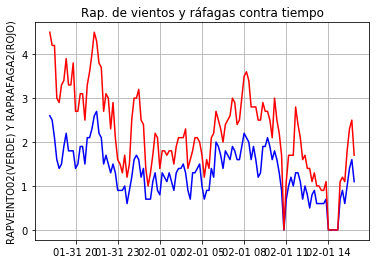

In [15]:
plt.plot_date(x=df.FECHA, y=df.RAPVIENTO2, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.RAPRAFAGA2, fmt="r-")
plt.title("Rap. de vientos y ráfagas contra tiempo")
plt.ylabel("RAPVEINTO02(AZUL) Y RAPRAFAGA2(ROJO)")
plt.grid(True)
plt.show()

In [18]:
df.describe()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,130.000000,130.0,130.000000
mean,156.450382,160.320611,1.327481,2.224427,21.370992,70.664122,1012.126923,0.0,47.146154
std,110.067197,106.602300,0.571779,0.971129,1.876473,9.796868,0.764096,0.0,74.101241
min,0.000000,0.000000,0.000000,0.000000,18.900000,51.000000,1011.100000,0.0,-1.000000
25%,65.000000,55.000000,0.900000,1.600000,19.800000,64.000000,1011.600000,0.0,-1.000000
50%,153.000000,162.000000,1.300000,2.200000,20.600000,72.000000,1011.900000,0.0,0.000000
75%,218.000000,238.500000,1.700000,2.900000,23.350000,77.500000,1012.400000,0.0,81.250000
max,360.000000,357.000000,2.700000,4.500000,24.600000,88.000000,1014.700000,0.0,255.000000
